### 一元线性回归

#### 数据预处理

In [4]:
import pandas as pd
import matplotlib.pyplot as mp #引入matplotlib用以画图
data=pd.read_csv(r'D:\Learning\ML_project\price.csv', encoding='gbk') #编码格式为gbk
xs = data["Area"]
ys = data["Price"]

In [5]:
# cost是点的y轴上述到预测线的距离，找到最小的cost也就找到了最佳的预测线
def cost_funtion(xs,ys,k,b):
    y_pred=k*xs+b
    cost = (ys - y_pred)**2
    cost = cost.sum()/len(xs)
    return cost # 注意这里返回的cost是一个数，不是集合

#### text

第    0 轮: Cost = 3357.8351, k = 7.21, b = 6.64
第  100 轮: Cost = 117.0987, k = 54.09, b = 15.24
第  200 轮: Cost = 54.7413, k = 66.40, b = 2.74
第  300 轮: Cost = 27.9096, k = 74.48, b = -5.47
第  400 轮: Cost = 16.3641, k = 79.77, b = -10.85
第  500 轮: Cost = 11.3963, k = 83.25, b = -14.38
第  600 轮: Cost = 9.2586, k = 85.52, b = -16.69
第  700 轮: Cost = 8.3388, k = 87.02, b = -18.21
第  800 轮: Cost = 7.9431, k = 88.00, b = -19.21
第  900 轮: Cost = 7.7728, k = 88.64, b = -19.86
------------------------------
训练完成！最佳方程: Price = 0.8906 * Area + -20.2858


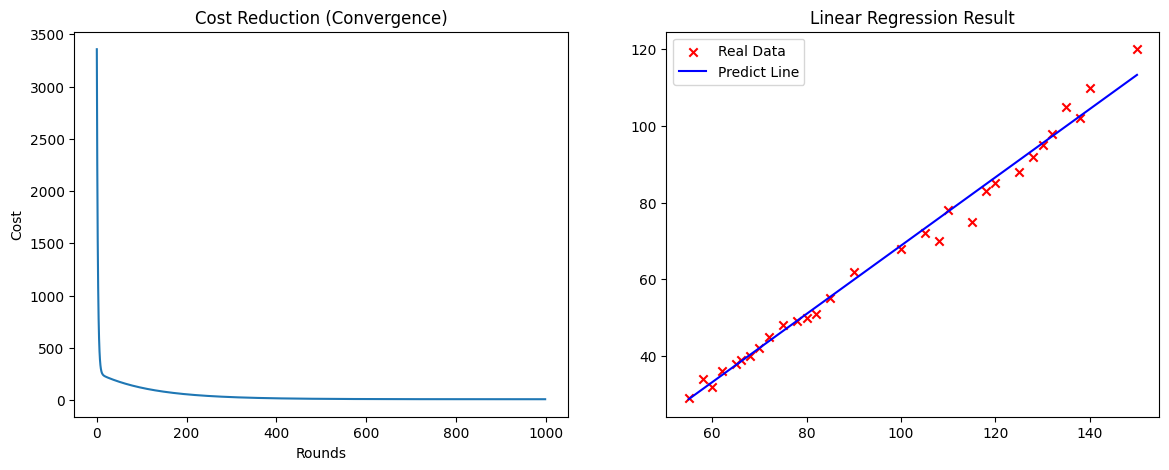

In [ ]:
import numpy as np

# 1. 准备工作：定义核心函数
# ==========================================



def count_gradient(xs, ys, k, b):
    """计算 k 和 b 的偏导数（即梯度）"""
    # 这里的 xs, ys 是向量，利用 numpy 的 mean 实现快速求导
    k_gradient = np.mean(xs * (k * xs + b - ys))
    b_gradient = np.mean(k * xs + b - ys)
    return k_gradient, b_gradient

def gradient_descent(xs, ys, k_init, b_init, lr, rounds):
    """执行梯度下降主循环"""
    k, b = k_init, b_init
    c_hist, k_hist, b_hist = [], [], []

    for i in range(rounds):
        # 计算当前位置的坡度
        k_grad, b_grad = count_gradient(xs, ys, k, b)
        
        # 向坡度的反方向迈步 (更新参数)
        k = k - k_grad * lr
        b = b - b_grad * lr
        
        # 记录每一步的数据，方便后续观察
        c_hist.append(cost_function(xs, ys, k, b))
        k_hist.append(k)
        b_hist.append(b)
        
        # 每隔 10% 的进度打印一次，看看它有没有在“下山”
        if i % (rounds // 10) == 0:
            print(f"第 {i:4} 轮: Cost = {c_hist[-1]:.4f}, k = {k:.2f}, b = {b:.2f}")
            
    return k, b, c_hist, k_hist, b_hist



# 【关键】特征缩放：如果直接用 Area (50-150)，k 的梯度会比 b 大 100 倍。
# 我们把面积缩小 100 倍，这样 k 和 b 的梯度就在同一个量级了。
xs = xs_raw / 100.0

# 3. 执行算法
# ==========================================

# 设置超参数
LR = 0.1         # 缩放数据后，学习率可以用比较大的 0.1
ROUNDS = 1000    # 迭代一千次
K_START = 0.0    # 初始猜测 k 为 0
B_START = 0.0    # 初始猜测 b 为 0

best_k, best_b, c_history, k_history, b_history = gradient_descent(xs, ys, K_START, B_START, LR, ROUNDS)

# 注意：因为我们对 xs 缩小了 100 倍，所以最终用于预测原始 Area 的 k 也要缩小 100 倍
final_k = best_k / 100.0
final_b = best_b

print("-" * 30)
print(f"训练完成！最佳方程: Price = {final_k:.4f} * Area + {final_b:.4f}")

# 4. 结果可视化
# ==========================================

fig, (ax1, ax2) = mp.subplots(1, 2, figsize=(14, 5))

# 图1：收敛曲线（看看 Cost 是不是在变小）
ax1.plot(c_history)
ax1.set_title("Cost Reduction (Convergence)")
ax1.set_xlabel("Rounds")
ax1.set_ylabel("Cost")

# 图2：拟合效果（看看直线画得准不准）
ax2.scatter(xs_raw, ys, color='red', marker='x', label='Real Data')
x_line = np.linspace(xs_raw.min(), xs_raw.max(), 100)
y_line = final_k * x_line + final_b
ax2.plot(x_line, y_line, color='blue', label='Predict Line')
ax2.set_title("Linear Regression Result")
ax2.legend()

mp.show()

#### 方法一：暴力穷举

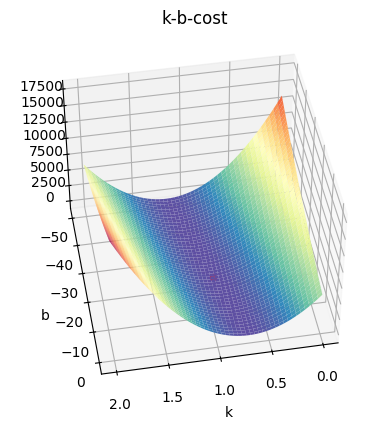

最小的cost： [7.66760688] 其中 k： [0.89447236] b： [-20.60301508]


In [6]:
# 暴力穷举法找到最小Cost

import numpy as np
ks=np.linspace(0,2,200) #左闭右开原则（-50，-49...48，49）步长默认为1
bs=np.linspace(-50,0,200)
costss=np.zeros((200,200))

i = 0
for t1 in ks:
    j = 0
    for t2 in bs:
        costss[i,j] = cost_funtion(xs,ys,t1,t2)
        j=j+1
    i=i+1
    
k_loca, b_loca = np.where(costss == np.min(costss))

#矩阵可视化
bgrid, kgrid = np.meshgrid(bs,ks)      
ax=mp.axes(projection="3d")
ax.plot_surface(kgrid ,bgrid ,costss, cmap="Spectral_r")
ax.set_title("k-b-cost")
ax.set_xlabel("k")
ax.set_ylabel("b")
ax.set_label("cost")
ax.scatter(ks[k_loca], bs[b_loca], costss[k_loca, b_loca], color="red", s=20, marker="o", alpha=0.8)
ax.view_init(44, 80)
mp.show()

print("最小的cost：", costss[k_loca,b_loca], "其中 k：",ks[k_loca], "b：", bs[b_loca])

In [7]:
#问题：学习率太大了

# k_grdent, b_grdent=Count_Grident(xs,ys,k,b)
# a=cost_funtion(xs,ys,k,b)
# k=k-k_grdent*0.00001
# b=b-b_grdent*0.01
# c=cost_funtion(xs,ys,k,b)
# k,b,a,c

#### 方法二：梯度下降

In [ ]:
#Count_Grident函数，计算 k， b 的斜率
def Count_Grident(xs, ys, k, b):
    k_grdent= ( xs * (k * xs + b - ys) ).mean() # 对复合函数cost=k*xs+b-ys中的k求偏导，mean()取均方误差
    b_grdent = (k * xs + b - ys).mean()
    return k_grdent, b_grdent

In [ ]:
# Grident descent 函数，用以逐渐逼近最佳cost
def Grident_descent(xs, ys, k, b, learning_rate, round):

    c_hist=[] # 用以存储每次cost的计算结果
    k_hist=[]
    b_hist=[]

    for i in range(round):
        
        k_grident, b_grident = Count_Grident(xs,ys,k,b)
        b=b-b_grident*learning_rate
        k=k-k_grident*learning_rate

        b_hist.append(b) # 将更新后的截距b存入b_hist集合
        k_hist.append(k)
        c_hist.append(cost_funtion(xs,ys,k, b))
        
        if (i%100==0):
            print(f"Round:{i:4}  cost: {cost_funtion(xs, ys, k, b):7.2f}, k: {k:.2f}, b: {b:.2f}, k_grident: {k_grident}, b_grident: {b_grident}")
    
    return k, b, c_hist, k_hist, b_hist

历史记录中最低 Cost 出现在第 999 轮
对应的最佳参数为: k=0.9780455322230175, b=-29.51193521707736


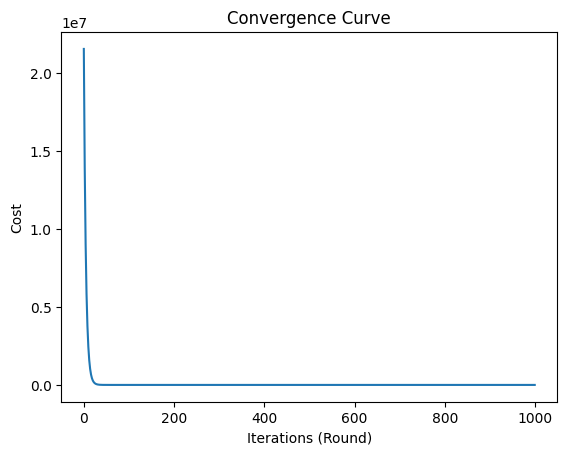

In [11]:
import matplotlib.pyplot as plt

k, b, c_hist, k_hist, b_hist = Grident_descent(xs,ys,-50, -30, 1e-5, 1000)

# 1. 找到 c_hist 中最小值的索引位置
min_index = np.argmin(c_hist)

# 2. 根据这个位置去 k_hist 和 b_hist 中取值
best_k_recorded = k_hist[min_index]
best_b_recorded = b_hist[min_index]
min_cost_recorded = c_hist[min_index]

print(f"历史记录中最低 Cost 出现在第 {min_index} 轮")
print(f"对应的最佳参数为: k={best_k_recorded}, b={best_b_recorded}")

# 可视化
plt.plot(c_hist)
plt.xlabel("Iterations (Round)")
plt.ylabel("Cost")
plt.title("Convergence Curve")
plt.show()

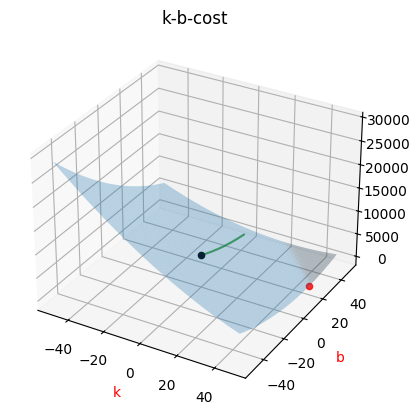

[np.float64(0.06636666666666666),
 np.float64(0.13266695964718134),
 np.float64(0.1989009453215183),
 np.float64(0.2650686900032656),
 np.float64(0.33117025993969146),
 np.float64(0.3972057213118105),
 np.float64(0.46317514023445),
 np.float64(0.5290785827563163),
 np.float64(0.5949161148600606),
 np.float64(0.6606878024623453),
 np.float64(0.7263937114139098),
 np.float64(0.7920339074996369),
 np.float64(0.8576084564386177),
 np.float64(0.9231174238842184),
 np.float64(0.9885608754241454),
 np.float64(1.0539388765805113),
 np.float64(1.1192514928099004),
 np.float64(1.184498789503434),
 np.float64(1.2496808319868364),
 np.float64(1.3147976855205)]

In [17]:
import numpy as np
ks=np.arange(-50,50)
bs=np.arange(-50,50)
costss=np.zeros((100,100))


i = 0
for t1 in ks:
    j = 0
    for t2 in bs:
        costss[i,j] = cost_funtion(xs,ys,t1,t2)
        j=j+1
    i=i+1   

# Grident descent方法求最佳cost
k, b, c_hist, k_hist, b_hist = Grident_descent(xs*1e-2,ys,0, 0, 1e-3, 1000)

#3D矩阵化
bgrid, kgrid = np.meshgrid(bs,ks)      
ax=mp.axes(projection="3d")
ax.plot_surface(kgrid ,bgrid ,costss, alpha=0.3)
ax.set_title("k-b-cost")
ax.set_xlabel("k", color="red")
ax.set_ylabel("b", color="red")
ax.set_label("cost")
k_loca, b_loca = np.where(costss == np.min(costss))
ax.scatter(ks[k_loca], bs[b_loca], costss[k_loca, b_loca], color="red", s=20, marker="o", alpha=0.8)

#可视化
ax.scatter(k_hist[0], b_hist[0],c_hist[0], color="black")
ax.plot(k_hist, b_hist,c_hist, color="green", alpha=0.7)
mp.show()
b_hist[:20]

#### 方法三：最小二乘法

计算完成！
最佳斜率 k (单价): 0.90
最佳截距 b (基础价): -21.11


d:\Learning\ML_project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


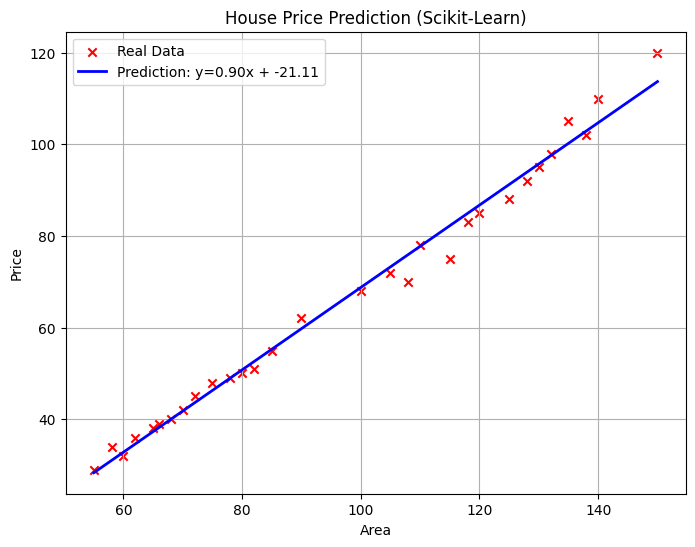

In [ ]:
from sklearn.linear_model import LinearRegression # 导入线性回归模型

# 用LinearRegression()方法计算
model = LinearRegression()
model.fit(xs, ys)

# 3. 获取最佳的 k (斜率) 和 b (截距)
best_k = model.coef_[0]      # coef_ 返回的是一个列表（因为可能有多个特征），我们取第一个
best_b = model.intercept_    # intercept_ 返回截距
print(f"最佳斜率 k : {best_k:.2f}")
print(f"最佳截距 b : {best_b:.2f}")


# 可视化验证 
mp.figure(figsize=(8, 6))
mp.scatter(data["Area"], data["Price"], color='red', marker='x', label='Real Data')

x_range = np.array([[data["Area"].min()], [data["Area"].max()]]) # 取最小和最大面积作为x轴端点
y_pred = model.predict(x_range)

mp.plot(x_range, y_pred, color='blue', linewidth=2, label=f'Prediction: y={best_k:.2f}x + {best_b:.2f}')

mp.title("House Price Prediction (Scikit-Learn)")
mp.xlabel("Area")
mp.ylabel("Price")
mp.legend()
mp.grid(True)
mp.show()

#### 结果可视化

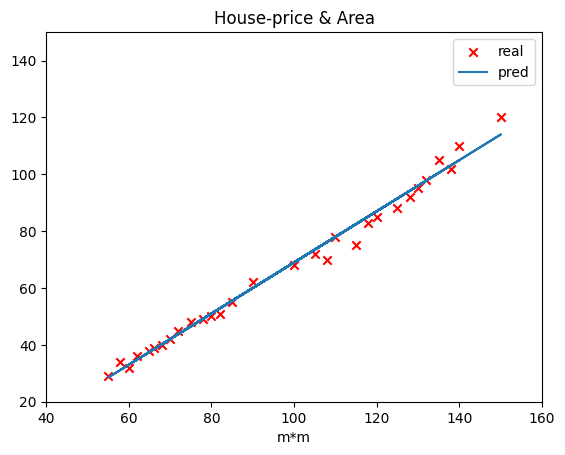

In [26]:
xs = data["Area"]
ys = data["Price"]
def pred_line(k, b):
    mp.scatter(xs, ys, label="real", color="red" ,marker=("x") )
    mp.title("House-price & Area")
    mp.xlabel("m*m")
    y_pred = xs * k + b  #x轴与y轴的关系
    mp.plot(xs, y_pred, label="pred")
    mp.ylim([20,150])
    mp.xlim([40,160])
    mp.legend()
    mp.show()
    
pred_line(0.9,-21) #假设的值